In [1]:
from tensorflow import keras
import numpy as np
import keras
import matplotlib.pyplot as plt
from keras import models
from keras import layers
from keras.utils import to_categorical

In [2]:
network = models.Sequential()
network.add(layers.Rescaling(1./255, input_shape=(150, 150, 3)))
network.add(layers.Conv2D(32, (3, 3), activation='relu'))
network.add(layers.MaxPooling2D((2, 2)))
network.add(layers.Conv2D(64, (3, 3), activation='relu'))
network.add(layers.MaxPooling2D((2, 2)))
network.add(layers.Conv2D(128, (3, 3), activation='relu'))
network.add(layers.MaxPooling2D((2, 2)))
network.add(layers.Conv2D(128, (3, 3), activation='relu'))
network.add(layers.MaxPooling2D((2, 2)))
network.add(layers.Flatten())
network.add(layers.Dense(512, activation='relu'))
network.add(layers.Dense(1, activation='sigmoid'))
network.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 150, 150, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       7

In [3]:
network.compile(optimizer=keras.optimizers.RMSprop(learning_rate=1e-4),
                loss='binary_crossentropy',
                metrics=['accuracy'])

In [4]:
from tensorflow.keras.preprocessing import  image_dataset_from_directory
 
train_dataset = image_dataset_from_directory(
    'C:\\Users\\tomek\\Documents\\MachineLearning\\lab3_ConvNetOne\\dataset_cats_dogs\\train',  # This is the target directory
    labels="inferred", 
    label_mode="binary", # Since we use binary_crossentropy loss, we need binary labels
    class_names=None,
    color_mode="rgb",
    batch_size=20,
    image_size=(150,150), # All images have different sizes and will be resized to 150x150
    shuffle=True,
)

Found 2000 files belonging to 2 classes.


In [5]:
test_dataset = image_dataset_from_directory(
    'C:\\Users\\tomek\\Documents\\MachineLearning\\lab3_ConvNetOne\\dataset_cats_dogs\\test',  # This is the target directory
    labels="inferred", 
    label_mode="binary", # Since we use binary_crossentropy loss, we need binary labels
    class_names=None,
    color_mode="rgb",
    batch_size=20,
    image_size=(150,150), # All images have different sizes and will be resized to 150x150
    shuffle=True,
)

Found 1000 files belonging to 2 classes.


In [6]:
validation_dataset = image_dataset_from_directory(
    'C:\\Users\\tomek\\Documents\\MachineLearning\\lab3_ConvNetOne\\dataset_cats_dogs\\validation',  # This is the target directory
    labels="inferred", 
    label_mode="binary", # Since we use binary_crossentropy loss, we need binary labels
    class_names=None,
    color_mode="rgb",
    batch_size=20,
    image_size=(150,150), # All images have different sizes and will be resized to 150x150
    shuffle=True,
)

Found 1000 files belonging to 2 classes.


In [7]:
history = network.fit(train_dataset, epochs=30, validation_data=validation_dataset)

Epoch 1/30
100/100 [==============================] - 54s 529ms/step - loss: 0.6913 - accuracy: 0.5360 - val_loss: 0.6930 - val_accuracy: 0.5080
Epoch 2/30
100/100 [==============================] - 50s 494ms/step - loss: 0.6567 - accuracy: 0.6280 - val_loss: 0.6819 - val_accuracy: 0.5520
Epoch 3/30
100/100 [==============================] - 47s 470ms/step - loss: 0.6123 - accuracy: 0.6650 - val_loss: 0.6324 - val_accuracy: 0.6360
Epoch 4/30
100/100 [==============================] - 46s 461ms/step - loss: 0.5743 - accuracy: 0.7010 - val_loss: 0.7039 - val_accuracy: 0.5990
Epoch 5/30
100/100 [==============================] - 47s 465ms/step - loss: 0.5348 - accuracy: 0.7270 - val_loss: 0.6268 - val_accuracy: 0.6570
Epoch 6/30
100/100 [==============================] - 49s 492ms/step - loss: 0.5122 - accuracy: 0.7435 - val_loss: 0.5835 - val_accuracy: 0.6950
Epoch 7/30
100/100 [==============================] - 51s 510ms/step - loss: 0.4928 - accuracy: 0.7565 - val_loss: 0.6296 - val_ac

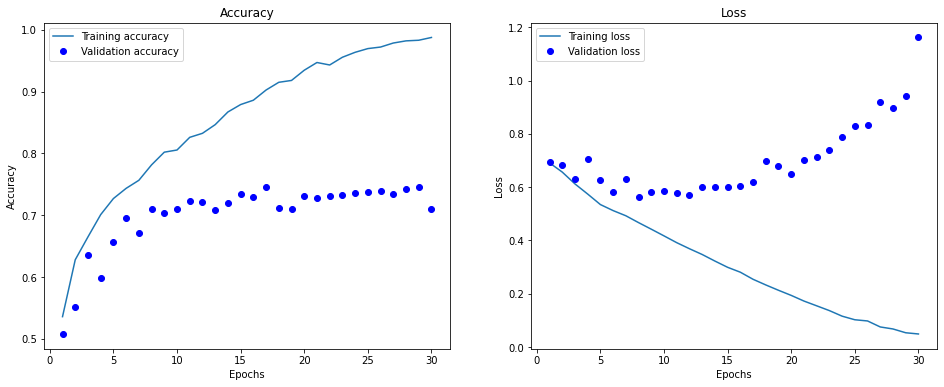

In [8]:
history_dict = history.history
history_dict.keys()

epochs = range(1, len(history_dict['accuracy']) + 1)
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs, history_dict['accuracy'], label="Training accuracy")
plt.plot(epochs, history_dict['val_accuracy'], 'bo', label="Validation accuracy")
plt.title("Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(epochs, history_dict['loss'], label="Training loss")
plt.plot(epochs, history_dict['val_loss'], 'bo', label="Validation loss")
plt.title("Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()


plt.show()